In [56]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [57]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [58]:
# Training Data
'''
TRAINING DATA
5400 - ones/zeros
5400 - other 
    [600 * 9 of 1/0 to 9]
'''

x_train_0 = x_full[y_full == 0][:5400]
y_train_0 = np.ones((5400,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_others = []
y_train_others = []
for digit in range(1,10):
    x_digit = x_full[y_full == digit][:600]
    y_digit = np.zeros((600,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5400, 28, 28)
	 (5400,)
lenght_training_other =>
	 9 9
shape_training_other =>
	 (5400, 28, 28)
	 (5400,)
shape_training_complete =>
	 (10800, 28, 28)
	 (10800,)


In [59]:
# Testing Data
'''
TESTING DATA
810 - ones/zeros
810 - other 
    [90 * 9 of 1/0 to 9]
'''

x_test_0 = x_test_full[y_test_full == 0][:810]
y_test_0 = np.ones((810,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_others = []
y_test_others = []
for digit in range(1,10):
    x_digit = x_test_full[y_test_full == digit][:90]
    y_digit = np.zeros((90,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_testing_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_testing_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)


x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (810, 28, 28)
	 (810,)
lenght_testing_other =>
	 9 9
shape_testing_other =>
	 (810, 28, 28)
	 (810,)
shape_testing_complete =>
	 (1620, 28, 28)
	 (1620,)


In [60]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))

model.add(layers.Flatten())
model.add(layers.Dense(3, activation='sigmoid'))  
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 11, 11, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 3, 3, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
'''
26 weights
27 bias 0
'''
for i in range(10):
    x=model.get_weights()[i]
    print((x))

[[[[-0.1764872 ]]

  [[-0.09303474]]

  [[ 0.11979133]]]


 [[[-0.39673448]]

  [[ 0.230721  ]]

  [[-0.1959669 ]]]


 [[[-0.4473441 ]]

  [[-0.38147575]]

  [[ 0.32137316]]]]
[0.]
[[[[-0.31227002]]

  [[ 0.1891731 ]]

  [[ 0.07530516]]]


 [[[-0.31376353]]

  [[ 0.3878184 ]]

  [[-0.10347489]]]


 [[[-0.23547617]]

  [[-0.5228605 ]]

  [[-0.2430807 ]]]]
[0.]
[[[[-0.55261725]]

  [[ 0.29223794]]

  [[-0.15255147]]]


 [[[ 0.20898622]]

  [[ 0.24776208]]

  [[-0.2808205 ]]]


 [[[ 0.08999377]]

  [[-0.23309219]]

  [[-0.14598003]]]]
[0.]
[[-6.4775997e-01  6.9589454e-01 -5.7673478e-01]
 [-4.5515931e-01 -3.1685057e-01  5.2297074e-01]
 [-4.0433982e-01 -6.9278997e-01 -5.5225199e-01]
 [-6.8443120e-02 -5.7052684e-01  2.3545033e-01]
 [ 2.1493256e-01 -3.9992401e-01  2.6114404e-01]
 [-3.4660101e-04 -3.3926666e-02  4.1256291e-01]
 [-3.6573347e-01 -2.7430177e-02  2.9356509e-01]
 [ 8.8798165e-02 -1.2285286e-01 -1.1775440e-01]
 [-4.1627818e-01  9.2302442e-02 -7.0192695e-01]]
[0. 0. 0.]
[[-0.97081184

In [62]:
def load_model_weights(model, weight_dir="../../generateModelWeights_week4/InitWeightsSeries"):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model)

Loaded weights for layer 0 from ../../generateModelWeights_week4/InitWeightsSeries\layer_number_0.npz
No weights found for layer 1.
Loaded weights for layer 2 from ../../generateModelWeights_week4/InitWeightsSeries\layer_number_2.npz
No weights found for layer 3.
Loaded weights for layer 4 from ../../generateModelWeights_week4/InitWeightsSeries\layer_number_4.npz
No weights found for layer 5.
Loaded weights for layer 6 from ../../generateModelWeights_week4/InitWeightsSeries\layer_number_6.npz
Loaded weights for layer 7 from ../../generateModelWeights_week4/InitWeightsSeries\layer_number_7.npz


In [63]:
'''
Should match
[[-0.42910326]
 [ 0.9825095 ]
 [ 1.2147812 ]]

'''
x=model.get_weights()[8]
print((x))

[[-0.42910326]
 [ 0.9825095 ]
 [ 1.2147812 ]]


In [64]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [65]:
save_dir = "./ZeroModelWeightsTraining"
save_weights_callback = SaveWeightsCallback(save_dir)

In [66]:
history = model.fit(
    x_train, y_train,
    epochs=10,  
    callbacks=[save_weights_callback]
)

Epoch 1/10
331/338 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - loss: 0.6602Saved weights for layer 0 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_0.npz
Saved weights for layer 2 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_2.npz
Saved weights for layer 4 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_4.npz
Saved weights for layer 6 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_6.npz
Saved weights for layer 7 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_7.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6603 - loss: 0.6592
Epoch 2/10
337/338 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.5115Saved weights for layer 0 to ./ZeroModelWeightsTraining\AfterEpoch2\Layer_0.npz
Saved weights for layer 2 to ./ZeroModelWeightsTraining\AfterEpoch2\Layer_2.npz
Saved weights for layer 4 to ./ZeroModelWeightsTraining\AfterEpoch2\Layer_4.npz
Saved weights for layer 6 to ./ZeroModelWeightsTraining\AfterEpoch2\Layer_6.npz
Saved weights for layer 7 to ./Zero

In [67]:
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")


Epoch 1: Accuracy = 0.7081
Epoch 2: Accuracy = 0.8256
Epoch 3: Accuracy = 0.8625
Epoch 4: Accuracy = 0.8926
Epoch 5: Accuracy = 0.9040
Epoch 6: Accuracy = 0.9160
Epoch 7: Accuracy = 0.9236
Epoch 8: Accuracy = 0.9300
Epoch 9: Accuracy = 0.9219
Epoch 10: Accuracy = 0.9270


In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.1603 
Test accuracy: 0.9333333373069763


First Conv2D Layer Kernels:


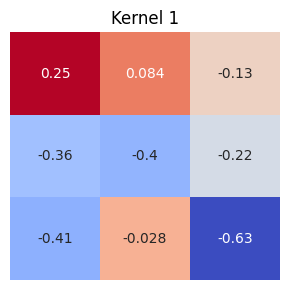

Second Conv2D Layer Kernels:


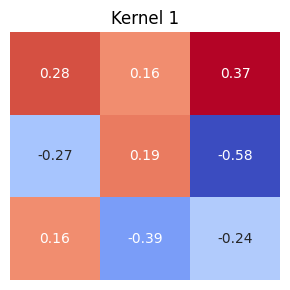

Third Conv2D Layer Kernels:


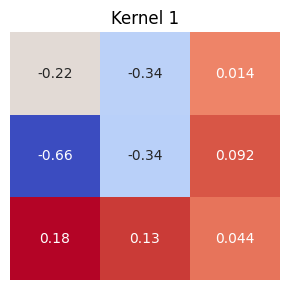

In [69]:
def plot_kernels(layer, num_kernels):
    kernels = layer.get_weights()[0]  # Get the kernel weights
    min_val = np.min(kernels)
    max_val = np.max(kernels)
    fig, axes = plt.subplots(1, num_kernels, figsize=(num_kernels * 3, 3))
    if num_kernels == 1:
        axes = [axes]      
    for i in range(num_kernels):
        kernel = kernels[:, :, 0, i]  # 3x3 for each kernel
        sns.heatmap(kernel, vmin=min_val, vmax=max_val, annot=True, cmap="coolwarm", cbar=False, ax=axes[i])
        axes[i].set_title(f'Kernel {i+1}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("First Conv2D Layer Kernels:")
plot_kernels(model.layers[0], 1)
print("Second Conv2D Layer Kernels:")
plot_kernels(model.layers[2], 1)
print("Third Conv2D Layer Kernels:")
plot_kernels(model.layers[4], 1)
